로지스틱 회귀-유방암
==
- 로지스틱회귀의 개념
- BreastCancer.csv

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
# pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
# fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4,10,11,12,14]

In [54]:
X = np.hstack((pass_time,fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4, 10. , 11. , 12. , 14. ])

In [55]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

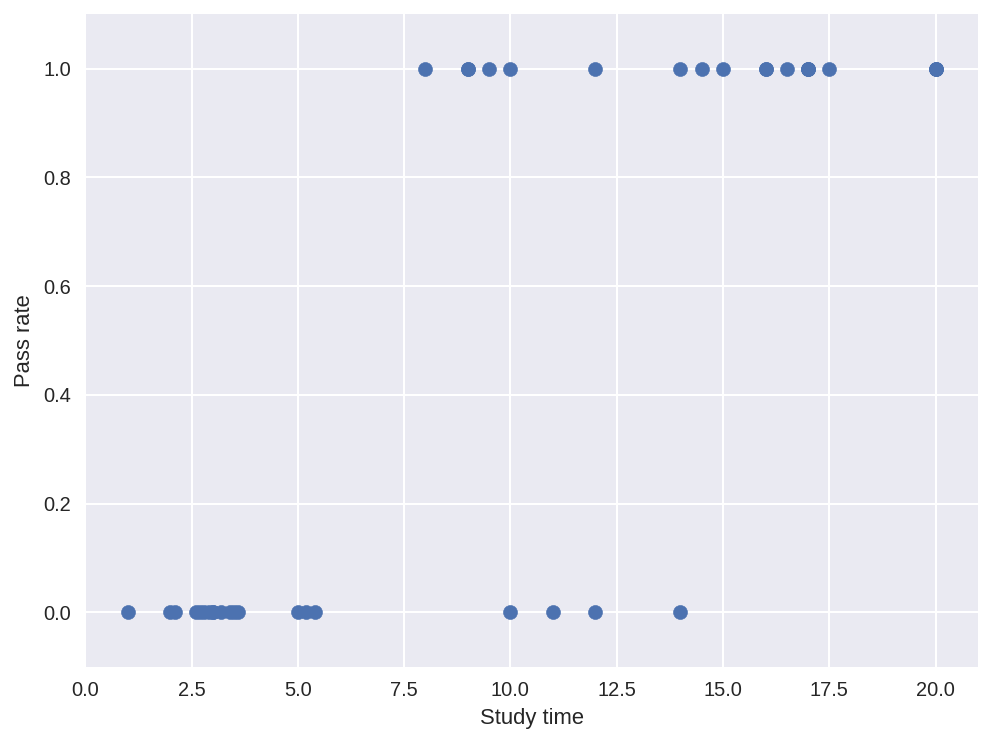

In [56]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X, y)
plt.show()

In [57]:
model = LogisticRegression()
model.fit(X.reshape(-1, 1),y)

print(model.coef_)
print(model.intercept_)

[[0.26571937]]
[-2.23110623]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
model.predict([[6.9],[2],[3.1],[5]])

array([0, 0, 0, 0])

In [59]:
#확률로 표시
model.predict_proba([[6.9],[2],[3.1],[5]])

array([[0.59812114, 0.40187886],
       [0.8454913 , 0.1545087 ],
       [0.80335177, 0.19664823],
       [0.71146491, 0.28853509]])

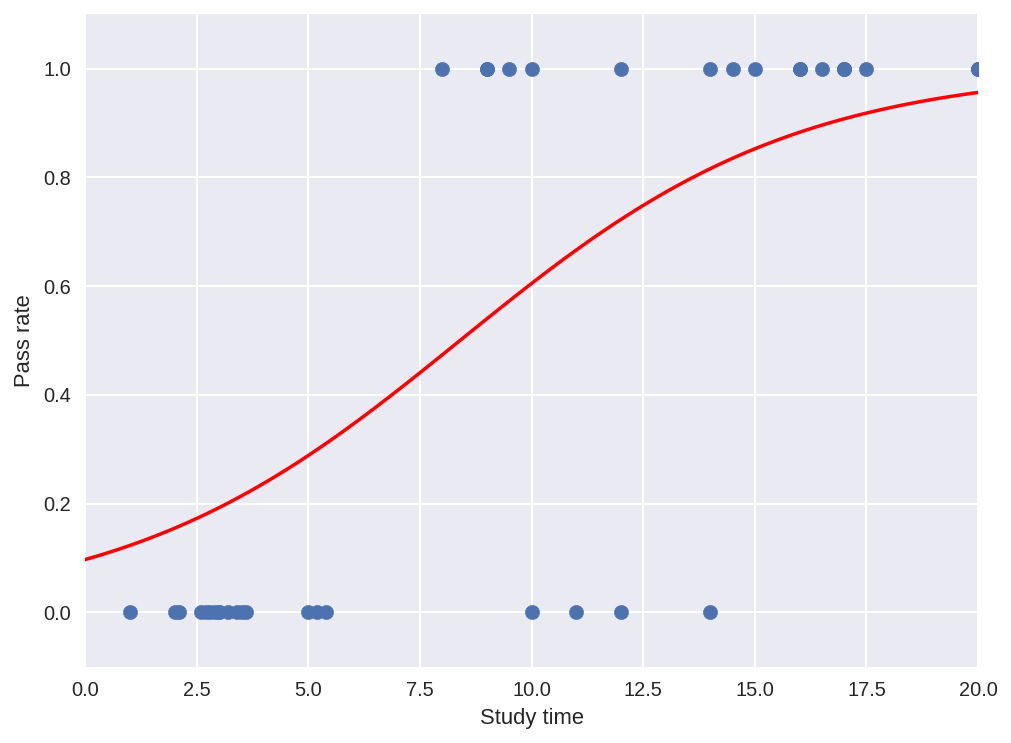

In [60]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(-1,21, 100)
yy = logreg(model.coef_*XX + model.intercept_)[0]
plt.plot(XX, yy, c='r')
# plt.show()

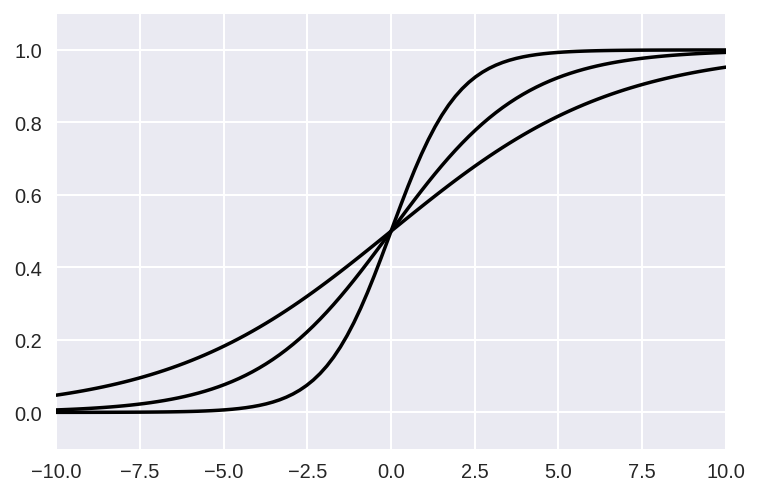

In [61]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c= 'k')

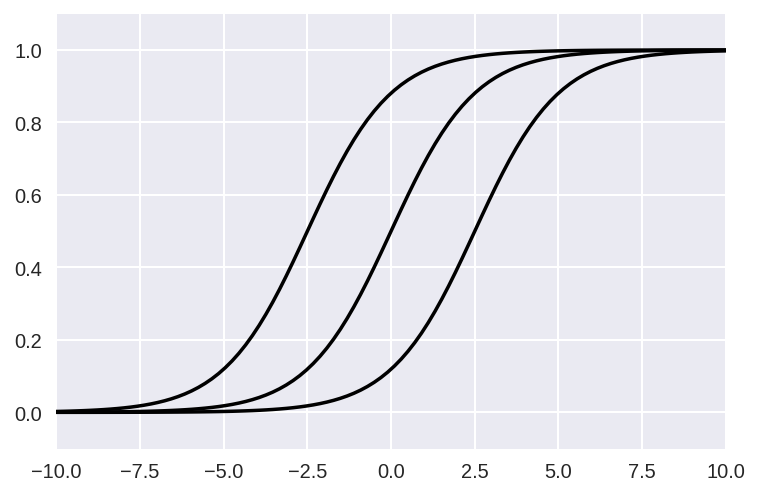

In [62]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2, 0, 2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logreg(a*XX + b)
        plt.plot(XX, yy, c='k')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   # K-fold cross validation
from sklearn import metrics

In [70]:
from sklearn.datasets import load_breast_cancer
data_load = load_breast_cancer()
data_load

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [86]:
data_load.feature_names.shape

(30,)

In [87]:
feature_name = data_load.feature_names.tolist()
feature_name
data = pd.DataFrame(data_load.data, columns=feature_name)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [0]:
!mkdir data

In [0]:
!mv breast_cancer.csv data/breast_cancer.csv

In [100]:
# data = pd.read_csv('/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/breast_cancer.csv')
data = pd.read_csv('data/breast_cancer.csv')

print(data.shape)

(569, 33)


In [101]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [102]:
data['diagnosis']


0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [103]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

,diagnosis,radius_mean,texture_mean
0,1,17.99,10.38
1,1,20.57,17.77
2,1,19.69,21.25
3,1,11.42,20.38
4,1,20.29,14.34


In [0]:
model=LogisticRegression()
y = df["diagnosis"]

In [105]:
features = ["radius_mean"]
X = df[features]
np.random.seed(11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 85.96%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [106]:
X_test.shape

(171, 1)

In [0]:
print(model.coef_)
print(model.intercept_)

In [0]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logreg(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [0]:
features = ["texture_mean"]
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

In [0]:
print(model.coef_)
print(model.intercept_)

In [0]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logreg(model.coef_ * XX + model.intercept_)[0], c='r')

In [0]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

In [0]:
markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

In [51]:
# 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행

data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)
X=data.drop('diagnosis', axis=1)

NameError: ignored

In [0]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
print("Score: {0:.2%}".format(model_all.score(X_test, y_test)))

Score: 93.57%


In [0]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 90.06%
K =  3 -> Score: 91.81%
K =  5 -> Score: 93.57%
K =  7 -> Score: 92.98%
K =  9 -> Score: 92.98%
K =  11 -> Score: 92.40%
K =  13 -> Score: 92.40%
K =  15 -> Score: 91.81%
K =  17 -> Score: 91.81%
K =  19 -> Score: 91.81%


In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 92.98%


In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 : 96.49%


## 소프트맥스
- 다항 로지스틱스

In [93]:
score = [-1, -0.5, 1.0, 1.5]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.045 0.074 0.333 0.548]
